In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_columns import childhood, demographic, diagnosis, all
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

In [9]:
init_df = pd.read_csv('./data/filtered_mental_health_data.csv')
df = init_df.copy()
df_filtered = df[df.columns[~df.columns.str.match(r'^(D_|DSM_)')]]
df_filtered.shape

(5001, 552)

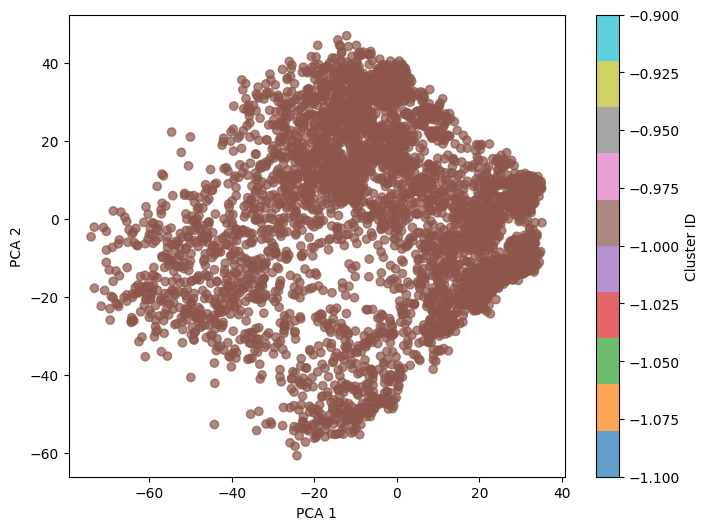

In [18]:
dbscan_df = df_filtered.copy()
dbscan = DBSCAN(eps=.7, min_samples=10)
labels_db = dbscan.fit_predict(dbscan_df)

pca3 = PCA(n_components=2) 
X_pca = pca3.fit_transform(dbscan_df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db, cmap="tab10", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()


In [21]:
eps_values = np.linspace(0.1, 2.0, 20)
results = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=10).fit(dbscan_df)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    if n_clusters > 1:
        sil = silhouette_score(dbscan_df, labels)
        dbi = davies_bouldin_score(dbscan_df, labels)
    else:
        sil, dbi = None, None
    
    results.append((eps, n_clusters, sil, dbi))

# Convert to DataFrame for easy inspection
import pandas as pd
df_results = pd.DataFrame(results, columns=['eps', 'n_clusters', 'silhouette', 'davies_bouldin'])
print(df_results)

    eps  n_clusters silhouette davies_bouldin
0   0.1           0       None           None
1   0.2           0       None           None
2   0.3           0       None           None
3   0.4           0       None           None
4   0.5           0       None           None
5   0.6           0       None           None
6   0.7           0       None           None
7   0.8           0       None           None
8   0.9           0       None           None
9   1.0           0       None           None
10  1.1           0       None           None
11  1.2           0       None           None
12  1.3           0       None           None
13  1.4           0       None           None
14  1.5           0       None           None
15  1.6           0       None           None
16  1.7           0       None           None
17  1.8           0       None           None
18  1.9           0       None           None
19  2.0           0       None           None


/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


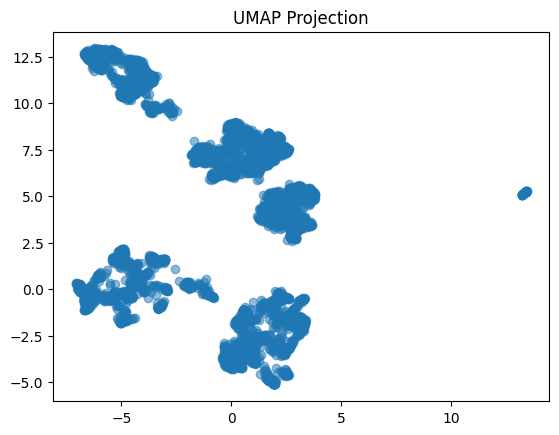

In [12]:

umap_model = umap.UMAP(random_state=42)
X_umap = umap_model.fit_transform(df_filtered)

plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
plt.title("UMAP Projection")
plt.show()

/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


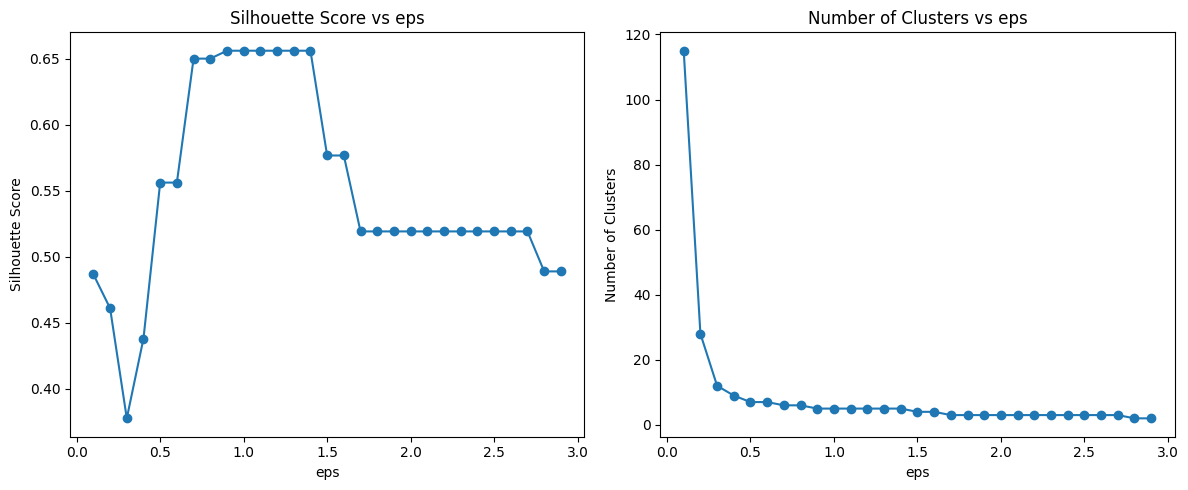

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import umap

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_filtered)

eps_values = np.arange(0.1, 3.0, 0.1)
silhouette_scores = []
n_clusters_list = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_umap)

    if len(set(labels)) > 1 and len(set(labels)) < len(X_umap):
        score = silhouette_score(X_umap[labels != -1], labels[labels != -1])
    else:
        score = -1 

    silhouette_scores.append(score)
    n_clusters_list.append(len(set(labels)) - (1 if -1 in labels else 0))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(eps_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs eps')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(eps_values, n_clusters_list, marker='o')
plt.title('Number of Clusters vs eps')
plt.xlabel('eps')
plt.ylabel('Number of Clusters')

plt.tight_layout()
plt.show()

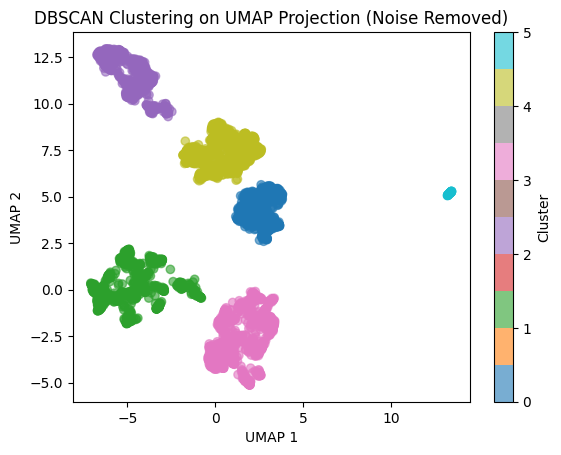

In [14]:
dbscan5 = DBSCAN(eps=.7, min_samples=5)
labels5 = dbscan5.fit_predict(X_umap)

mask = labels5 != -1
X_umap_filtered5 = X_umap[mask]
labels5_filtered = labels5[mask]

plt.scatter(X_umap_filtered5[:, 0], X_umap_filtered5[:, 1], c=labels5_filtered, cmap="tab10", alpha=0.6)
plt.title("DBSCAN Clustering on UMAP Projection (Noise Removed)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()

In [23]:
sil_coeff = silhouette_score(X_umap,labels5)
print("Silhouette Coefficient:", round(sil_coeff, 3))

score = davies_bouldin_score(X_umap, labels5)
print("Davis - Bouldin score:",score)

Silhouette Coefficient: 0.65
Davis - Bouldin score: 0.44465044176139207


In [24]:
eps_values = np.linspace(0.1, 2.0, 20)  # adjust range to your dataset
results = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=10).fit(X_umap)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    if n_clusters > 1:
        sil = silhouette_score(X_umap, labels)
        dbi = davies_bouldin_score(X_umap, labels)
    else:
        sil = np.nan
        dbi = np.nan
    
    results.append((eps, n_clusters, sil, dbi))

df_results = pd.DataFrame(results, columns=['eps', 'n_clusters', 'silhouette', 'davies_bouldin'])
print(df_results)

    eps  n_clusters  silhouette  davies_bouldin
0   0.1          92    0.190678        1.151192
1   0.2          40    0.360525        1.301034
2   0.3          15    0.371888        1.656193
3   0.4          10    0.430487        1.058515
4   0.5           7    0.510938        0.497741
5   0.6           7    0.510938        0.497741
6   0.7           6    0.650285        0.444650
7   0.8           6    0.650285        0.444650
8   0.9           5    0.656277        0.413903
9   1.0           5    0.656277        0.413903
10  1.1           5    0.656277        0.413903
11  1.2           5    0.656277        0.413903
12  1.3           5    0.656277        0.413903
13  1.4           5    0.656277        0.413903
14  1.5           4    0.576867        0.529511
15  1.6           4    0.576867        0.529511
16  1.7           3    0.519319        0.636692
17  1.8           3    0.519319        0.636692
18  1.9           3    0.519319        0.636692
19  2.0           3    0.519319        0